<a href="https://colab.research.google.com/github/yasarsabir/Project-4/blob/main/Student_classification_80_20_scaled_hotencodedtuition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
# Import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

In [54]:
pip install csv_to_sqlite

In [55]:
import csv_to_sqlite

# all the usual options are supported
options = csv_to_sqlite.CsvOptions(typing_style="full")#, encoding="windows-1250")
input_files = ["datacleaned.csv"] # pass in a list of CSV files
csv_to_sqlite.write_csv(input_files, "students.sqlite", options)




Error on table datacleaned.csv: 
 table [datacleaned] already exists
Written 0 rows into 1 tables in 0.092 seconds


0

---

### Demonstrate that the model utilizes data retrieved from SQL or Spark

In [56]:
import sqlite3
con = sqlite3.connect("students.sqlite")
cur = con.cursor()
sqlresult= cur.execute("SELECT * FROM 'datacleaned'").fetchall()

Headers = ['Marital status','Course','Day_evening attendance','Previous qualification','Nationality','Mothers qualification','Fathers qualification','Mothers occupation','Fathers occupation','Displaced','Educational special needs','Debtor','Tuition fees up to date','Gender','Scholarship holder','Age at enrollment','International','Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)','Unemployment rate','Inflation rate','GDP','Target']
student_data_df = pd.DataFrame(sqlresult, columns = Headers)
student_data_df.head()

,Marital status,Course,Day_evening attendance,Previous qualification,Nationality,Mothers qualification,Fathers qualification,Mothers occupation,Fathers occupation,Displaced,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,2,1,1,1,13,10,6,10,1,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,11,1,1,1,1,3,4,4,1,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,5,1,1,1,22,27,10,10,1,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,15,1,1,1,23,27,6,4,1,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,3,0,1,1,22,28,10,10,0,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Split the Data into Training and Testing Sets

### Step 1: Read the `student_data.csv` data from the folder into a Pandas DataFrame.

In [57]:
#Read the CSV file from the Resources folder into a Pandas DataFrame
student_data_df = pd.read_csv(
    Path("datacleaned.csv")
)

# Review the DataFrame
student_data_df.head()

,Marital status,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,2,1,1,1,13,10,6,10,1,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,11,1,1,1,1,3,4,4,1,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,5,1,1,1,22,27,10,10,1,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,15,1,1,1,23,27,6,4,1,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,3,0,1,1,22,28,10,10,0,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [58]:
# Generate summary statistics
student_data_df.describe()

,Marital status,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,...,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.184298,9.935537,0.887603,2.552617,1.242424,12.558678,16.663636,7.212948,7.650138,0.549036,...,0.128926,0.581818,6.296419,7.763085,4.518457,10.036155,0.142149,11.630358,1.231598,-0.009256
std,0.613009,4.340715,0.315897,3.952440,1.700394,9.006183,10.993025,3.707343,4.315144,0.497658,...,0.679111,2.022688,2.263020,3.964163,3.162376,5.481742,0.747670,2.667652,1.384911,2.259986
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,5.000000,0.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.517857,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,11.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,8.000000,1.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000
75%,1.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,10.000000,1.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000
max,6.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,46.000000,1.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [59]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
from sklearn.preprocessing import StandardScaler
student_data_df_scaled = StandardScaler().fit_transform(student_data_df[[
       'Marital status', 'Daytime/evening attendance',
       'Previous qualification', 'Nacionality',
       'Displaced', 'Educational special needs', 'Debtor',
       'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Unemployment rate',
       'Inflation rate', 'GDP']])
student_data_df_scaled

array([[-0.30068558,  0.35585028, -0.39287907, ..., -0.31131218,
         0.12161459,  0.77411864],
       [-0.30068558,  0.35585028, -0.39287907, ...,  0.85091858,
        -1.10607007,  0.35370412],
       [-0.30068558,  0.35585028, -0.39287907, ..., -0.31131218,
         0.12161459,  0.77411864],
       ...,
       [-0.30068558,  0.35585028, -0.39287907, ...,  0.85091858,
        -1.10607007,  0.35370412],
       [-0.30068558,  0.35585028, -0.39287907, ..., -0.83619059,
        -1.46715379, -1.37663355],
       [-0.30068558,  0.35585028, -0.39287907, ...,  0.4010228 ,
         1.78259971, -0.74822447]])

In [60]:
# Create a DataFrame of the scaled data
student_data_df_scaled = pd.DataFrame(student_data_df_scaled, columns=[
       'Marital status', 'Daytime/evening attendance',
       'Previous qualification', 'Nacionality',
       'Displaced', 'Educational special needs', 'Debtor',
     'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)',
        'Unemployment rate',
       'Inflation rate', 'GDP'])
student_data_df_scaled.head()

,Marital status,Daytime/evening attendance,Previous qualification,Nacionality,Displaced,Educational special needs,Debtor,Gender,Scholarship holder,Age at enrollment,...,Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
0,-0.300686,0.355850,-0.392879,-0.142589,0.906297,-0.105556,-0.358302,1.380697,-0.603447,-0.442212,...,-2.083224,-0.189871,-0.287686,-2.782691,-1.958586,-1.429014,-1.831085,-0.311312,0.121615,0.774119
1,-0.300686,0.355850,-0.392879,-0.142589,0.906297,-0.105556,-0.358302,1.380697,-0.603447,-0.569976,...,0.685217,-0.189871,-0.287686,-0.131002,-0.444817,0.468555,0.662383,0.850919,-1.106070,0.353704
2,-0.300686,0.355850,-0.392879,-0.142589,0.906297,-0.105556,-0.358302,1.380697,-0.603447,-0.569976,...,-2.083224,-0.189871,-0.287686,-0.131002,-1.958586,-1.429014,-1.831085,-0.311312,0.121615,0.774119
3,-0.300686,0.355850,-0.392879,-0.142589,0.906297,-0.105556,-0.358302,-0.724272,-0.603447,-0.442212,...,0.572219,-0.189871,-0.287686,-0.131002,0.564362,0.152293,0.431281,-0.836191,-1.467154,-1.376634
4,1.330837,-2.810171,-0.392879,-0.142589,-1.103391,-0.105556,-0.358302,-0.724272,-0.603447,2.751894,...,0.355641,-0.189871,-0.287686,-0.131002,-0.444817,0.468555,0.540750,0.850919,-1.106070,0.353704


In [61]:
#CODE JUST THE NAMES, TO KEEP, not run
'''student_dummies = pd.get_dummies(student_data_df[['Marital status', 'Daytime/evening attendance',
       'Previous qualification', 'Nacionality', "Mother's qualification",
       "Father's qualification", "Mother's occupation", "Father's occupation",
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
        'Unemployment rate',
       'Inflation rate', 'GDP']])'''

'student_dummies = pd.get_dummies(student_data_df[[\'Marital status\', \'Daytime/evening attendance\',\n       \'Previous qualification\', \'Nacionality\', "Mother\'s qualification",\n       "Father\'s qualification", "Mother\'s occupation", "Father\'s occupation",\n       \'Displaced\', \'Educational special needs\', \'Debtor\',\n       \'Tuition fees up to date\', \'Gender\', \'Scholarship holder\',\n       \'Age at enrollment\', \'International\',\n       \'Curricular units 1st sem (credited)\',\n       \'Curricular units 1st sem (enrolled)\',\n       \'Curricular units 1st sem (evaluations)\',\n       \'Curricular units 1st sem (approved)\',\n       \'Curricular units 1st sem (grade)\',\n       \'Curricular units 1st sem (without evaluations)\',\n       \'Curricular units 2nd sem (credited)\',\n       \'Curricular units 2nd sem (enrolled)\',\n       \'Curricular units 2nd sem (evaluations)\',\n       \'Curricular units 2nd sem (approved)\',\n       \'Curricular units 2nd sem (grade

In [62]:
#Transform the relevant column using get_dummies:encode the nationalities
student_dummies = pd.get_dummies(student_data_df['Tuition fees up to date'])
# Display the transformed data
student_dummies.tail()

,0,1
3625,0,1
3626,1,0
3627,0,1
3628,0,1
3629,0,1


In [63]:
#Rename the columns for the student_dummies df
new_column_names = ['Yes', 'No']
student_dummies.columns = new_column_names
student_dummies

,Yes,No
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
3625,0,1
3626,1,0
3627,0,1
3628,0,1


In [64]:
#Transform the other categorical data
#'Course',
#"Mother's qualification",
 #      "Father's qualification", "Mother's occupation", "Father's occupation",

In [65]:
#Replace the Graduate and Dropout variables with binary code.
target_df =student_data_df.replace({'Target' : { 'Graduate' : 0, 'Dropout' : 1}})
target_df.head()

,Marital status,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,2,1,1,1,13,10,6,10,1,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,11,1,1,1,1,3,4,4,1,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,5,1,1,1,22,27,10,10,1,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,15,1,1,1,23,27,6,4,1,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,3,0,1,1,22,28,10,10,0,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


In [66]:
#Join the the target column, the encoded nationality and the scaled data together
student_data_df_scaled['Target'] = target_df['Target']
student_data_df_scaled[['Tuition fee uptodate', 'Tuition not uptodate']] = student_dummies

student_data_df_scaled.head()

,Marital status,Daytime/evening attendance,Previous qualification,Nacionality,Displaced,Educational special needs,Debtor,Gender,Scholarship holder,Age at enrollment,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target,Tuition fee uptodate,Tuition not uptodate
0,-0.300686,0.355850,-0.392879,-0.142589,0.906297,-0.105556,-0.358302,1.380697,-0.603447,-0.442212,...,-2.782691,-1.958586,-1.429014,-1.831085,-0.311312,0.121615,0.774119,1,0,1
1,-0.300686,0.355850,-0.392879,-0.142589,0.906297,-0.105556,-0.358302,1.380697,-0.603447,-0.569976,...,-0.131002,-0.444817,0.468555,0.662383,0.850919,-1.106070,0.353704,0,1,0
2,-0.300686,0.355850,-0.392879,-0.142589,0.906297,-0.105556,-0.358302,1.380697,-0.603447,-0.569976,...,-0.131002,-1.958586,-1.429014,-1.831085,-0.311312,0.121615,0.774119,1,1,0
3,-0.300686,0.355850,-0.392879,-0.142589,0.906297,-0.105556,-0.358302,-0.724272,-0.603447,-0.442212,...,-0.131002,0.564362,0.152293,0.431281,-0.836191,-1.467154,-1.376634,0,0,1
4,1.330837,-2.810171,-0.392879,-0.142589,-1.103391,-0.105556,-0.358302,-0.724272,-0.603447,2.751894,...,-0.131002,-0.444817,0.468555,0.540750,0.850919,-1.106070,0.353704,0,0,1


### Step 2: Create the labels set (`y`)  from the “Target” column, and then create the features (`X`) DataFrame from the remaining columns.

In [67]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = student_data_df_scaled['Target']


# Separate the X variable, the features
X = student_data_df_scaled.drop(columns=['Target'])

In [68]:
# Review the y variable Series
#y[:5]

display(y.head())
display(y.tail())

0    1
1    0
2    1
3    0
4    0
Name: Target, dtype: int64

3625    0
3626    1
3627    1
3628    0
3629    0
Name: Target, dtype: int64

In [69]:
# Review the X variable DataFrame
X[:5]


,Marital status,Daytime/evening attendance,Previous qualification,Nacionality,Displaced,Educational special needs,Debtor,Gender,Scholarship holder,Age at enrollment,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Tuition fee uptodate,Tuition not uptodate
0,-0.300686,0.355850,-0.392879,-0.142589,0.906297,-0.105556,-0.358302,1.380697,-0.603447,-0.442212,...,-0.287686,-2.782691,-1.958586,-1.429014,-1.831085,-0.311312,0.121615,0.774119,0,1
1,-0.300686,0.355850,-0.392879,-0.142589,0.906297,-0.105556,-0.358302,1.380697,-0.603447,-0.569976,...,-0.287686,-0.131002,-0.444817,0.468555,0.662383,0.850919,-1.106070,0.353704,1,0
2,-0.300686,0.355850,-0.392879,-0.142589,0.906297,-0.105556,-0.358302,1.380697,-0.603447,-0.569976,...,-0.287686,-0.131002,-1.958586,-1.429014,-1.831085,-0.311312,0.121615,0.774119,1,0
3,-0.300686,0.355850,-0.392879,-0.142589,0.906297,-0.105556,-0.358302,-0.724272,-0.603447,-0.442212,...,-0.287686,-0.131002,0.564362,0.152293,0.431281,-0.836191,-1.467154,-1.376634,0,1
4,1.330837,-2.810171,-0.392879,-0.142589,-1.103391,-0.105556,-0.358302,-0.724272,-0.603447,2.751894,...,-0.287686,-0.131002,-0.444817,0.468555,0.540750,0.850919,-1.106070,0.353704,0,1


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [70]:
# Check the balance of our target values

y.value_counts()
# therefore 2209 Graduates, 1421 dropouts, as you can see data is slightly imabalanced

0    2209
1    1421
Name: Target, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [71]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=1,
                                                    stratify=y,
                                                    test_size= 0.2)

#set to 80% to train, 20% to test, specify the amount you wish to test


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [72]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [73]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
visual_predictions = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
visual_predictions

,Prediction,Actual
584,1,1
3252,1,1
177,1,1
322,1,1
1169,0,0
...,...,...
640,0,0
3225,1,1
418,1,1
2108,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [74]:
# Print the balanced_accuracy score of the model
from sklearn.metrics import accuracy_score
balanced_accuracy_score(y_test, predictions)

0.9098448154993308

In [75]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[423,  19],
       [ 39, 245]])

In [76]:
# Print the classification report for the model
from sklearn.metrics import classification_report
target_names = ["Graduate", "Dropout"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

    Graduate       0.92      0.96      0.94       442
     Dropout       0.93      0.86      0.89       284

    accuracy                           0.92       726
   macro avg       0.92      0.91      0.92       726
weighted avg       0.92      0.92      0.92       726



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (Graduate) and `1` (Dropout) labels using the 20/80 test/train split?

**Answer:**Still Excellent at predicting Graduates (96% recall) in comparison to 25%/75% test/train split. The recall for dropouts has increased from 86% to 87%).

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: We used the `RandomOverSampler` module from the imbalanced-learn library to resample the data, thus ensuring that both our labels of graduate vs dropout had an equal number of data points.

In [77]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
oversample = RandomOverSampler(sampling_strategy='minority')

# Fit the original training data to the random_oversampler model
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [78]:
# Count the distinct values of the resampled labels data
y_over.value_counts()


0    1767
1    1767
Name: Target, dtype: int64

In [79]:
# so now we have taken equal number of samples from both healthy and high risk loans

In [80]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model

classifier_rebalanced = LogisticRegression(solver='lbfgs', random_state=1)


# Fit the model using the resampled training data
classifier_rebalanced.fit(X_over, y_over)

# Make a prediction using the testing data

predictions_rebalanced = classifier_rebalanced.predict(X_test)
joanna = pd.DataFrame({"Prediction": predictions_rebalanced, "Actual": y_test})





In [81]:
#'''make joanna into a scatter plot. ideas: scale the data, hot encode the data. group the students into segments. eg students working vs not working'''

### Step 2: We usd the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [82]:
# Print the balanced_accuracy score of the model
from sklearn.metrics import accuracy_score
balanced_accuracy_score(y_test, predictions_rebalanced)

0.9133739086100312

In [83]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions_rebalanced)

array([[409,  33],
       [ 28, 256]])

In [84]:
# Print the classification report for the model

from sklearn.metrics import classification_report
target_names = ["Graduate", "Dropout"]
print(classification_report(y_test, predictions_rebalanced, target_names=target_names))

              precision    recall  f1-score   support

    Graduate       0.94      0.93      0.93       442
     Dropout       0.89      0.90      0.89       284

    accuracy                           0.92       726
   macro avg       0.91      0.91      0.91       726
weighted avg       0.92      0.92      0.92       726



### Step 4: We answered the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (graduate) and `1` (dropout) labels usign the 20/80 test/train split?

**Answer:** When using the oversampled data of the dropouts, the overall accuracy has remianed the same at 92%, however the recall for the dropout label has increased from 88% to 90% a.

Use Random Forest to determine which Features are important in the model.

In [85]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_over, y_over)

RandomForestClassifier(random_state=0)

In [86]:
X.columns

Index(['Marital status', 'Daytime/evening attendance',
       'Previous qualification', 'Nacionality', 'Displaced',
       'Educational special needs', 'Debtor', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Tuition fee uptodate',
       'Tuition not uptodate'],
      dtype='object')

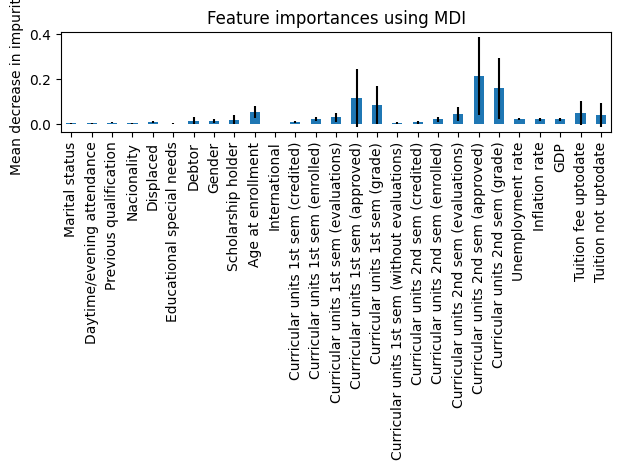

In [87]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Remove all the curricular units from the dataset and retrain the model to determine whether accuracy improves.

#we are usign random forest to bring in the important feature, so things which we think are important can be removed and we can retrain the model. Only remove one at a time. Those features with the  
#after this bring in the deep learning code.

We retrained the model using a test/train split of 80/20 and the RandomOverSample module.

Feature 26